In [1]:
# We still haven't done the simplest, dumbest measurement we could: compare density vs. year.

In [2]:
from sciterra import Atlas
import pandas as pd
import plotnine as pn

In [3]:
from collections import Counter

def years_histogram(
    atl: Atlas,
) -> pn.ggplot:
    """Get a histogram of the years of publication."""

    years = Counter([pub.publication_date.year for pub in atl.publications.values()])

    return (
        pn.ggplot(
            data = pd.DataFrame(
                data=[(year, count) for year,count in years.items()],
                columns=["year", "count"],
            ),
            mapping=pn.aes(x="year", y="count"),
        )
        + pn.geom_col()
    )

In [4]:
atlas_dir = "/Users/nathanielimel/uci/projects/citesim/outputs/librarian=S2/vectorizer=SciBERT/center=hafenLowredshiftLymanLimit2017"

atl = Atlas.load(atlas_dir)

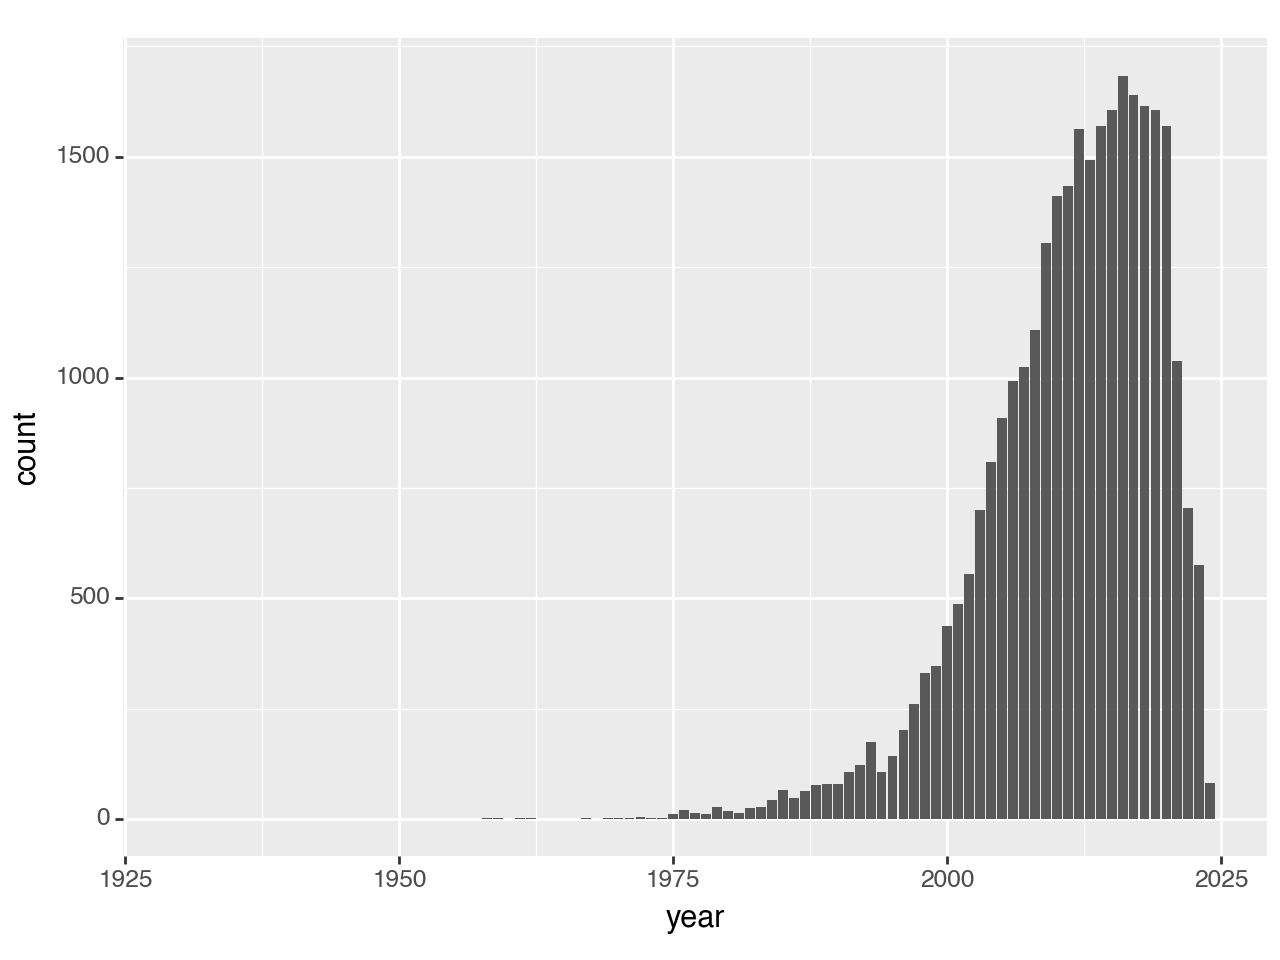

<Figure Size: (640 x 480)>

In [5]:
years_histogram(atl)

In [6]:
import os
data_fn = os.path.join(atlas_dir, "all_data.csv")
all_data = pd.read_csv(data_fn)
all_data

,density,edginess,citations_per_year,is_center,identifier,year
0,41.100833,0.679679,1.333333,False,1ccf300b3f4965f831a41232ba4b7c0c3c90d929,2020
1,38.076275,0.721620,44.818182,False,1d4e43c1be145f6711ec00af900a8658d82623a0,2012
2,41.553209,0.708944,5.125000,False,16e772e28b3470cb0050328c6e5a500882ff15ae,2015
3,30.062907,0.686039,0.000000,False,0bc5bf8a556f158b1bdaada28ce9cbd28c5d55a4,2017
4,39.494263,0.681023,1.500000,False,35d7b77f2a6436124346d80aabc4bd66d5e0bd8b,2017
...,...,...,...,...,...,...
14590,39.448212,0.694232,13.571429,False,d5596d0f8d6febe158eb5a398593f3cbab4b2eef,2016
14591,36.824599,0.736382,0.307692,False,eccb060a3496eda338a2bd069efecd55e42f34e5,2010
14592,32.379318,0.669752,1.769231,False,c011f490bc86d9da3556a9335e772ddd2cb97842,2010
14593,35.996497,0.646283,0.722222,False,2e936fee7c86fafed421243d8a66bb3deb5e72d9,2005


/Users/nathanielimel/miniforge3/envs/citesim/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 64'. Pick better value with 'binwidth'.


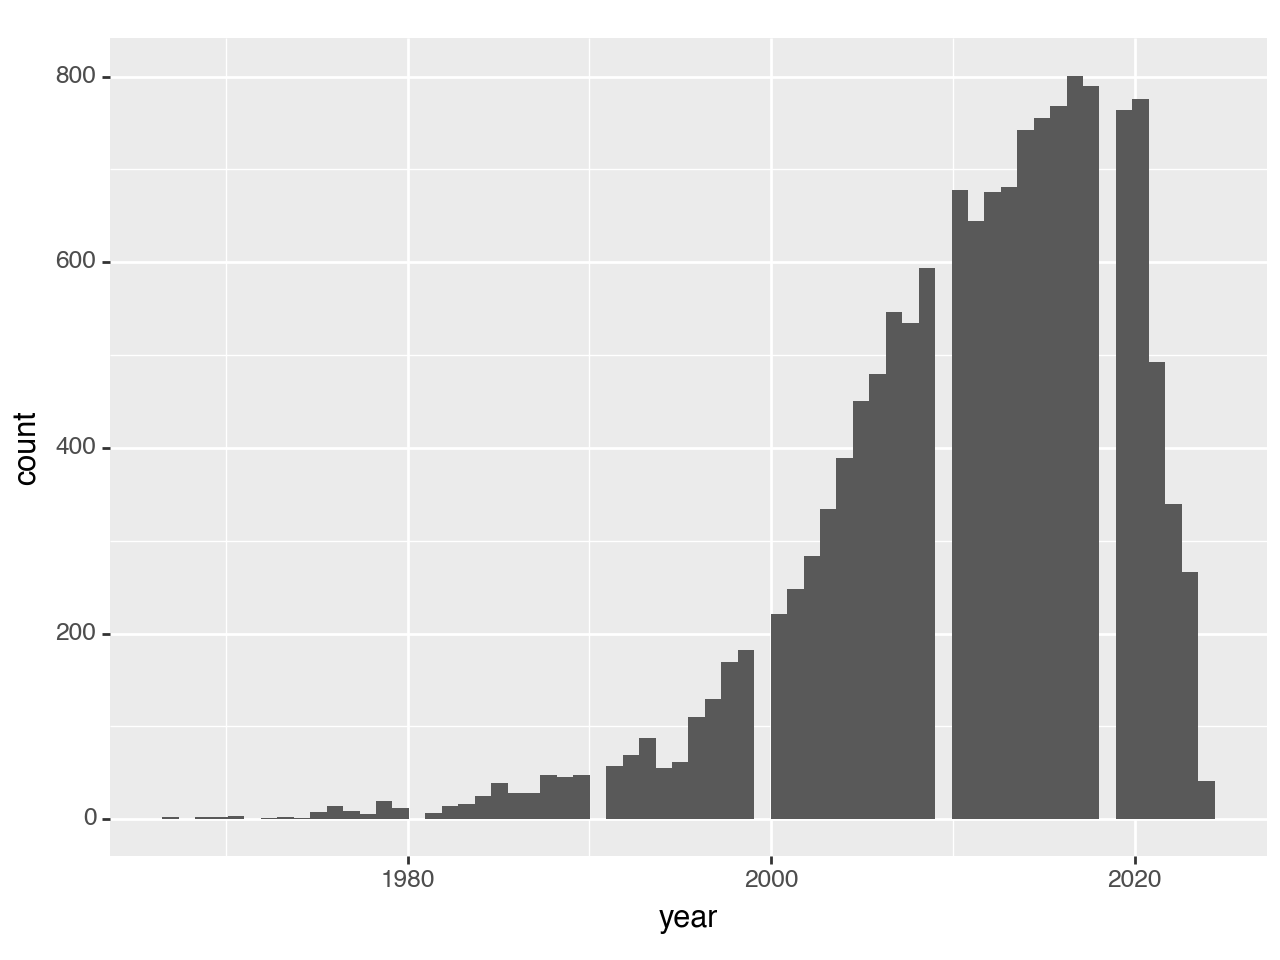

<Figure Size: (640 x 480)>

In [8]:
# get the year histogram for the filtered df
(
    pn.ggplot(all_data)
    + pn.geom_histogram(pn.aes(x="year"))
)

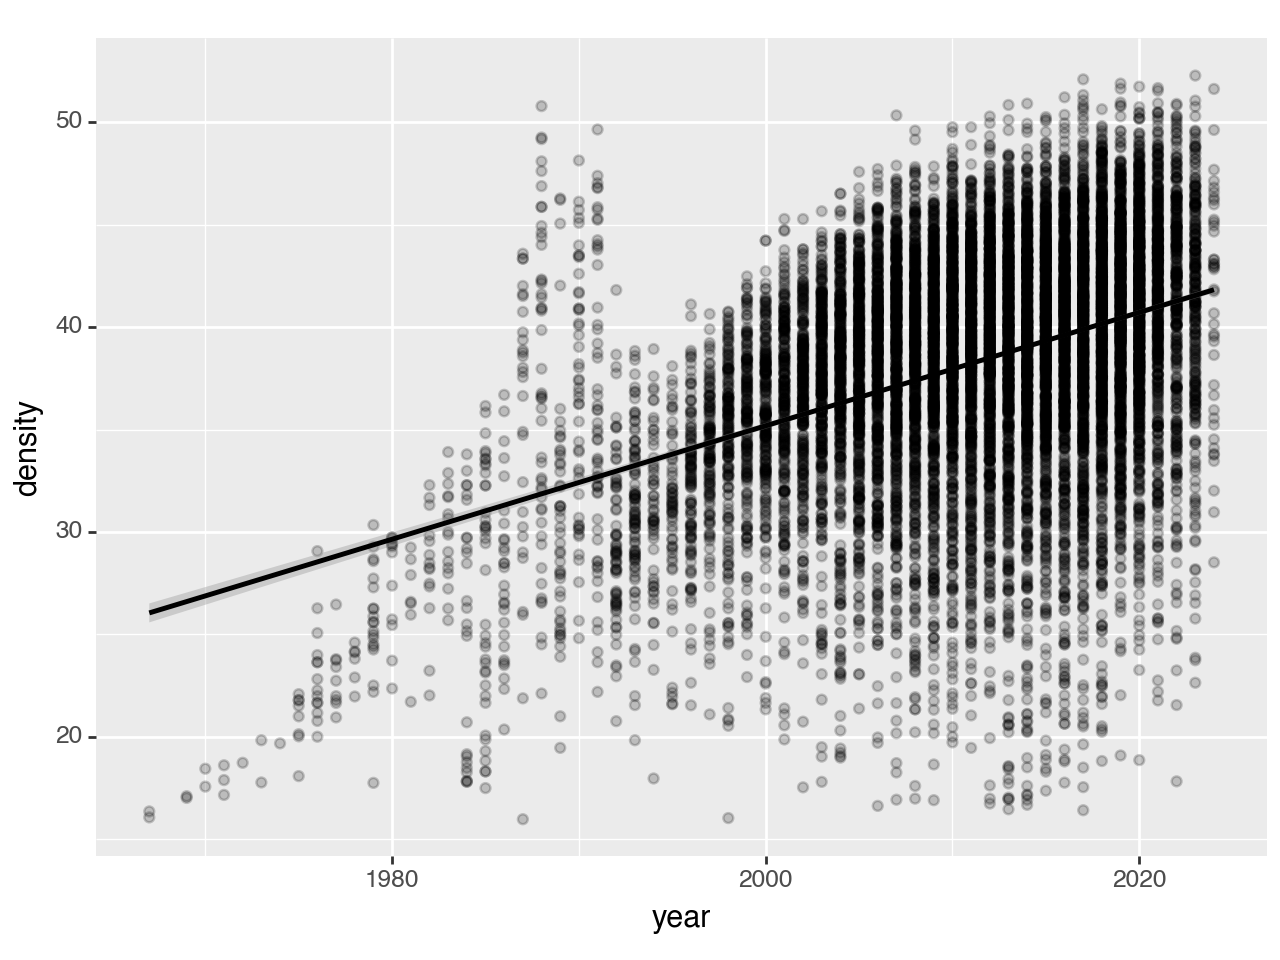

<Figure Size: (640 x 480)>

In [20]:
# Now simply plot density over year
# A strong correlation is unsurprising.
(
    pn.ggplot(
        all_data,
        pn.aes(
            x="year",
            y="density",
        )
    )
    + pn.geom_point(alpha=0.2)
    + pn.geom_smooth(color="orange")
)

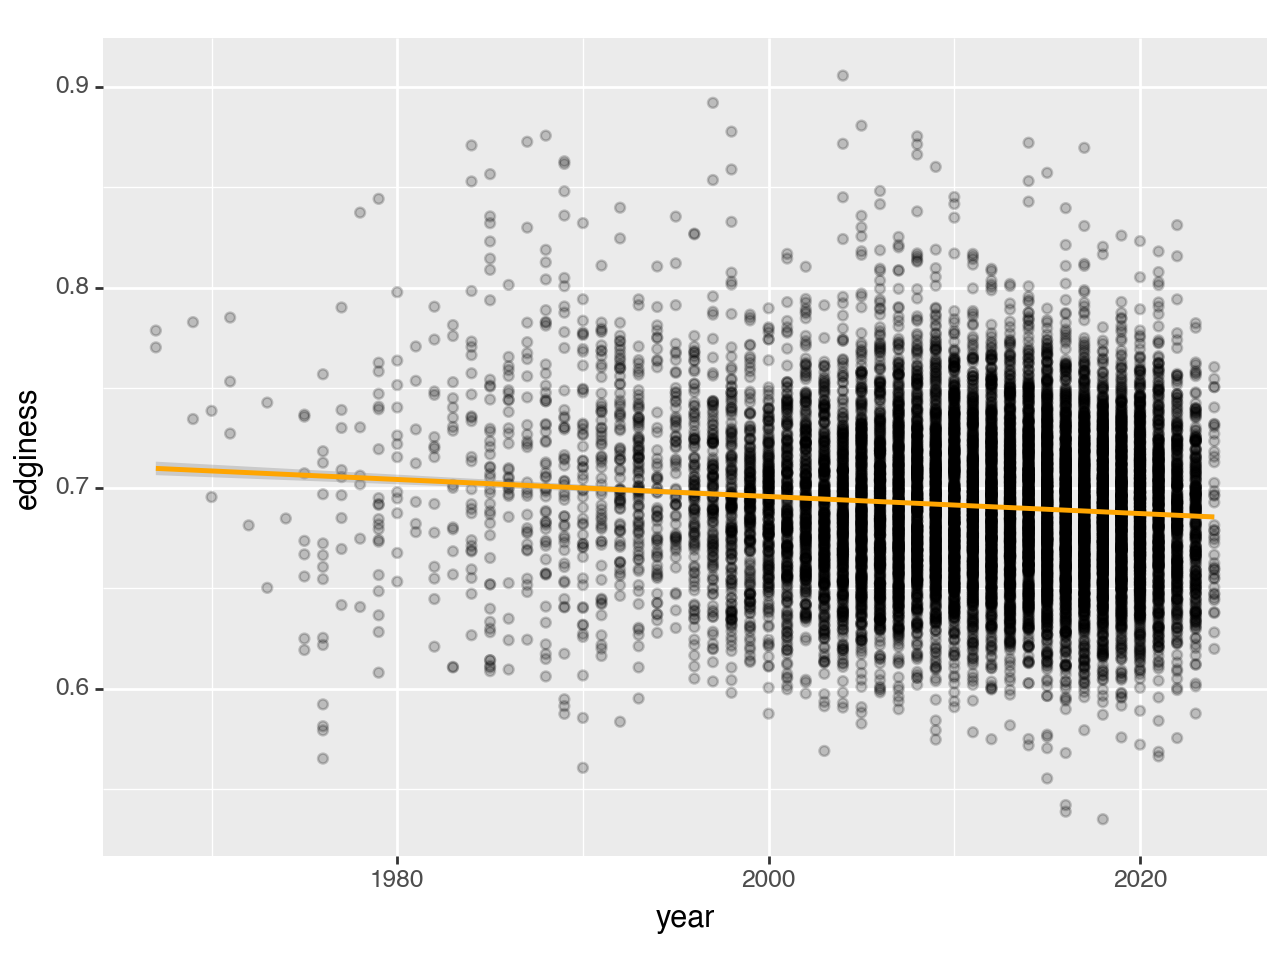

<Figure Size: (640 x 480)>

In [17]:
# Now plot edginess over year
# Less clear that this will be correlated
(
    pn.ggplot(
        all_data,
        pn.aes(
            x="year",
            y="edginess",
        )
    )
    + pn.geom_point(alpha=0.2)
    + pn.geom_smooth(color="orange")
)

In [19]:
from scipy.stats import linregress

linregress(
    all_data.year,
    all_data.edginess,
)

LinregressResult(slope=-0.0004248395316781753, intercept=1.5454907689743291, rvalue=-0.09139447275087097, pvalue=1.884669247708257e-28, stderr=3.831874357258592e-05, intercept_stderr=0.0770582494399334)

In [ ]:
# What if we look at the evolution of density scaled by count? Does this even make sense?

